<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 4 / SPRINT 2 / NOTE 1*

# 📝 Assignment

---


# Text Preprocessing for NLP

Women's E-Commerce Clothing Reviews
https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

이번 과제의 목표는: 캐글 옷 리뷰 데이터의 텍스트 칼럼(`Review Text`)에서 토큰(단어)를 추출하고 추천(`Recommended IND`)을 할지(1) 안 할지(0)에 따른 토큰의 빈도를 살펴 보는 것 입니다.

토큰을 분리하기 위해 사용 가능한 정제기술을 모두 사용하고 특히
- Lemmatization
- 확장된 불용어 처리
기술을 잘 활용해 보세요

토큰이 만들어지면 꼭 **올바른 토큰화**를 잘 만족하는지 확인 합니다. 그리고 결과를 분석하여 어떤 특성이 추천에 이르게 하는지 그래프로 설명하세요. 마크다운 셀을 최대한 활용하여 결과를 분석해 보시기 바랍니다.

In [31]:
# !python -m spacy download en_core_web_lg
# !pip install --upgrade spacy

2021-04-12 11:29:45.321241: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 778.8MB 21kB/s 
  Found existing installation: en-core-web-lg 2.2.5
    Uninstalling en-core-web-lg-2.2.5:
      Successfully uninstalled en-core-web-lg-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
Requirement already up-to-date: spacy in /usr/local/lib/python3.7/dist-packages (3.0.5)


In [32]:
import re
import spacy
import pandas as pd
from nltk.stem import PorterStemmer
from spacy.tokenizer import Tokenizer

In [33]:
from google.colab import files
uploaded = files.upload()

Saving Womens Clothing E-Commerce Reviews.csv to Womens Clothing E-Commerce Reviews (1).csv


In [34]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col = 'Unnamed: 0')
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [35]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [36]:
df.dtypes

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [37]:
# shape 확인 
df.shape

(23486, 10)

In [38]:
# 결측치 drop을 위한 비율 계산
23486 * 0.1

2348.6

In [39]:
# 결측치 모두 제거 
df = df.dropna()

In [40]:
# 결측치 제거 여부 확인 
df.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

### 1) Spacy 코스를 수강하세요
- chapter1의 1~5 강좌 수강 (https://course.spacy.io/en/)
  - 챕터 1, 2, 3, 4, 5를 수강하는 것은 아닙니다!
- 문항 1) chapter1-5의 강의를 들으시고, 해당 제목을 입력하시오.

1. Introduction to spaCy
2. Getting Started
3. Documents, spans and tokens
4. Lexical attributes
5. Statistical models

### 2) 토큰을 정제합니다. 
- 문자를 소문자로 통일
- 분석에 관련 없는 정보 제거

- 문항 2-1) 소문자로 변경하는 함수를 입력하시오. 
- 문항 2-2) re 라이브러리에서 알파벳 소문자, 숫자만 받을 수 있는 코드를 작성하시오. 

In [41]:
# 2-1
# str.lower()

# 2-2
# re.sub("[^a-z0-9 ]", "", text)

In [42]:
def token_preprocessing(text):
    text = str(text).lower()
    regex = r'[^a-zA-Z0-9 ]'
    text = re.sub(regex, '', text)
    
    return text

df['Review Text_tokens'] = df['Review Text'].apply(token_preprocessing)
df[['Review Text','Review Text_tokens']].head()

,Review Text,Review Text_tokens
2,I had such high hopes for this dress and reall...,i had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl...",i love love love this jumpsuit its fun flirty ...
4,This shirt is very flattering to all due to th...,this shirt is very flattering to all due to th...
5,"I love tracy reese dresses, but this one is no...",i love tracy reese dresses but this one is not...
6,I aded this in my basket at hte last mintue to...,i aded this in my basket at hte last mintue to...


 대문자, -, it's의 ' , love의 , 등이 제거 된 것을 관측할 수 있음

In [50]:
spacy.load('en_core_web_lg')

In [43]:
nlp = spacy.load('en_core_web_lg')
tokenizer = Tokenizer(nlp.vocab)

df['tokens'] = df['Review Text_tokens'].apply(lambda x : [token.text for token in tokenizer(x)])
df['tokens'].head(10)

2     [i, had, such, high, hopes, for, this, dress, ...
3     [i, love, love, love, this, jumpsuit, its, fun...
4     [this, shirt, is, very, flattering, to, all, d...
5     [i, love, tracy, reese, dresses, but, this, on...
6     [i, aded, this, in, my, basket, at, hte, last,...
7     [i, ordered, this, in, carbon, for, store, pic...
8     [i, love, this, dress, i, usually, get, an, xs...
9     [im, 55, and, 125, lbs, i, ordered, the, s, pe...
10    [dress, runs, small, esp, where, the, zipper, ...
12    [more, and, more, i, find, myself, reliant, on...
Name: tokens, dtype: object

### 3) 정제한 토큰을 시각화 합니다.
- Top 10 토큰을 프린트 합니다.
- 토큰의 수, 빈도 순위, 존재 문서 수, 비율 등 정보를 계산합니다.
- 토큰 순위에 따른 퍼센트 누적 분포 그래프를 시각화 합니다.
- 추천(recommended_ind)/비추천에 따라 비교되는 토큰을 시각화 합니다.
- 문항 3) 추천 토큰 순위 10개 단어를 입력하시오.

In [44]:
# !pip install squarify

In [45]:
import squarify
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer

In [51]:
word_counts = Counter()
df['tokens'].apply(lambda x: word_counts.update(x))

word_counts.most_common(10)

[('the', 68149),
 ('i', 52486),
 ('and', 43715),
 ('a', 38304),
 ('it', 37862),
 ('is', 27479),
 ('this', 22869),
 ('to', 21854),
 ('in', 18466),
 ('but', 14576)]

In [52]:
def word_count(docs):
    # 전체 코퍼스에서 단어 빈도 카운트
    word_counts = Counter()

    # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
    word_in_docs = Counter()

    # 전체 문서의 갯수
    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # 단어의 순위
    # method='first': 같은 값의 경우 먼저나온 요소를 우선
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # 코퍼스 내 단어의 비율
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')

    # 누적 비율
    # cumsum() : cumulative sum
    wc['cul_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
    wc = ac.merge(wc, on='word')
    
    # 전체 문서 중 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [53]:
wc = word_count(df['tokens'])
wc.head()

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
1,the,17342,68149,1.0,0.055809,0.055809,0.882006
56,i,16696,52486,2.0,0.042982,0.098792,0.849151
9,and,17169,43715,3.0,0.035800,0.134591,0.873207
63,a,15681,38304,4.0,0.031368,0.165960,0.797528
14,it,14369,37862,5.0,0.031006,0.196966,0.730801


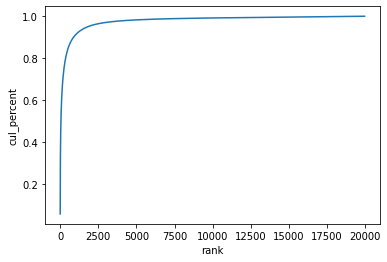

In [54]:
# 누적분포그래프 그리기 
sns.lineplot(x='rank', y='cul_percent', data=wc);

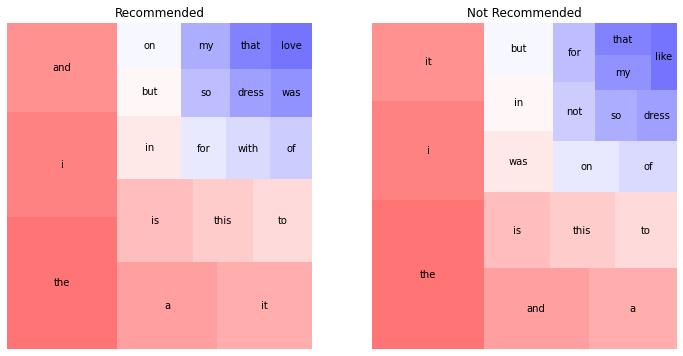

In [63]:
Recommend = df[df['Recommended IND'] == 1]
NotRecommend = df[df['Recommended IND'] != 1]

Recommend_count = word_count(Recommend['tokens'])
NotRecommend_count = word_count(NotRecommend['tokens'])

Recommend20 = Recommend_count[Recommend_count['rank'] <= 20]
NotRecommend20 = NotRecommend_count[NotRecommend_count['rank'] <= 20]

color = sns.color_palette("bwr_r",20)

fig,ax = plt.subplots(1,2, figsize=(12,6))
squarify.plot(sizes=Recommend20['percent'],color = color, label=Recommend20['word'], alpha=0.6,ax=ax[0])
squarify.plot(sizes=NotRecommend20['percent'],color = color, label=NotRecommend20['word'], alpha=0.6,ax=ax[1])
ax[0].set_title('Recommended')
ax[1].set_title('Not Recommended')
ax[0].axis('off')
ax[1].axis('off')
plt.show()

### 4) 확장된 불용어 사전을 사용해 토큰을 정제합니다.

- 문항 4) 불용어를 제거하고 난 뒤 토큰 순위 10개의 단어를 입력하시오.

In [65]:
# 불용어 확장
STOP_WORDS = nlp.Defaults.stop_words.union('dress')

df['Not Stopwords'] = df['Review Text'].apply(token_preprocessing)

# 불용어 제거
tokens = []
for doc in nlp.pipe(df['Not Stopwords']):
  doc_tokens = []
  for token in doc:
    if (token.text not in STOP_WORDS)&(token.is_punct==False)&(token.is_space==False):
      doc_tokens.append(token.text)
  tokens.append(doc_tokens)

# Add a Column
df['Not Stopwords'] = tokens
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Text_tokens,tokens,Not Stopwords
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,i had such high hopes for this dress and reall...,"[i, had, such, high, hopes, for, this, dress, ...","[high, hopes, dress, wanted, work, initially, ..."
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,i love love love this jumpsuit its fun flirty ...,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,this shirt is very flattering to all due to th...,"[this, shirt, is, very, flattering, to, all, d...","[shirt, flattering, adjustable, tie, perfect, ..."
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,i love tracy reese dresses but this one is not...,"[i, love, tracy, reese, dresses, but, this, on...","[love, tracy, reese, dresses, petite, 5, feet,..."
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,i aded this in my basket at hte last mintue to...,"[i, aded, this, in, my, basket, at, hte, last,...","[aded, basket, hte, mintue, look, like, person..."


In [67]:
Stopwords_count = word_count(df['Not Stopwords'])
Stopwords_count[:10]

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
0,dress,5317,9239,1.0,0.017678,0.017678,0.270420
22,size,5822,7759,2.0,0.014846,0.032525,0.296104
38,love,6388,7667,3.0,0.014670,0.047195,0.324891
129,nt,5798,7480,4.0,0.014313,0.061508,0.294884
35,fit,5471,6485,5.0,0.012409,0.073917,0.278252
92,like,5102,6243,6.0,0.011946,0.085862,0.259485
149,m,4627,5840,7.0,0.011175,0.097037,0.235327
37,wear,4886,5694,8.0,0.010895,0.107932,0.248500
40,great,4464,5253,9.0,0.010051,0.117984,0.227037
158,fabric,3670,4253,10.0,0.008138,0.126122,0.186654


### 5) 통계적 트리밍 사용 전/후 토큰 분포를 비교합니다.
- 문서 등장 비율이 20% 미만이고, 최소 1% 이상 등장하는 단어만 선택한 뒤,
- 통계적 트리밍 사용 전/후 토큰 분포 시각화하고,
- 문항 5-1) 통계적 트리밍 후 상위 토큰 10개의 단어를 입력하시오.
- 문항 5-2) 불용어 처리 & 통계적 트리밍 후 상위 토큰 10개의 단어를 입력하시오.

In [68]:
wc_stat = wc[(0.01 <= wc['word_in_docs_percent'])&( wc['word_in_docs_percent']< 0.20)]
Stopwords_stat = Stopwords_count[(Stopwords_count['word_in_docs_percent']<0.20)&(Stopwords_count['word_in_docs_percent']>=0.01)]

Text(0.5, 1.0, 'After removing stopwords Trimming')

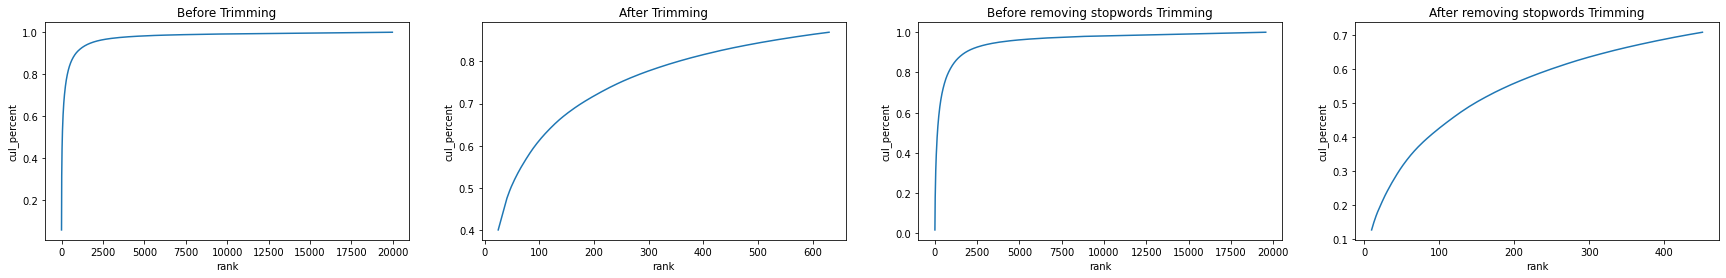

In [70]:
fig,ax = plt.subplots(1,4, figsize=(30,4))
sns.lineplot(x='rank', y='cul_percent', data=wc,ax=ax[0])
sns.lineplot(x='rank', y='cul_percent', data=wc_stat,ax=ax[1])
sns.lineplot(x='rank', y='cul_percent', data=Stopwords_count,ax=ax[2])
sns.lineplot(x='rank', y='cul_percent', data=Stopwords_stat,ax=ax[3])
ax[0].set_title('Before Trimming')
ax[1].set_title('After Trimming')
ax[2].set_title('Before removing stopwords Trimming')
ax[3].set_title('After removing stopwords Trimming')

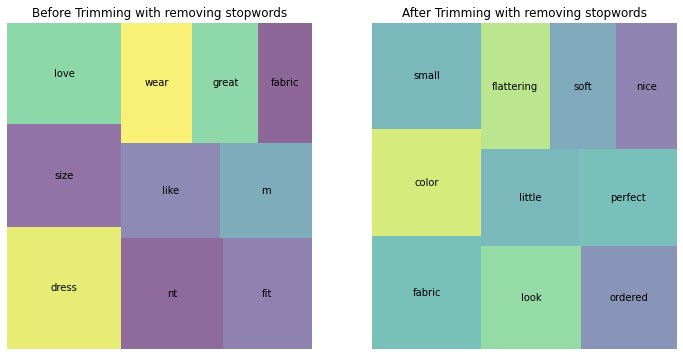

In [71]:
fig,ax = plt.subplots(1,2, figsize=(12,6))
squarify.plot(sizes=Stopwords_count['percent'][:10], label=Stopwords_count['word'][:20], alpha=0.6,ax=ax[0])
squarify.plot(sizes=Stopwords_stat['percent'][:10], label=Stopwords_stat['word'][:20], alpha=0.6,ax=ax[1])
ax[0].set_title('Before removing stopwords Trimming')
ax[1].set_title('After removing stopwords Trimming')

color = sns.color_palette("bwr_r",20)

ax[0].axis('off')
ax[1].axis('off')
plt.show()

### 6) Lemmatization 사용 효과를 분석해 봅니다.
- 문항 6-1) Stemming한 뒤 상위 10개 단어를 입력하시오.
- 문항 6-2) Lemmatization을 진행한 뒤 상위 10개 단어를 입력하시오.

In [72]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

tokens = []
for doc in df['Not Stopwords']:
    doc_tokens = []
    for token in doc:
        doc_tokens.append(ps.stem(token))
    tokens.append(doc_tokens)

df['stems'] = tokens

In [73]:
wc_stem = word_count(df['stems'])
wc_stem20 = wc_stem[wc_stem['rank'] <= 20]
wc_stem20[:10]

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
0,dress,5964,10687,1.0,0.020449,0.020449,0.303326
33,fit,7981,10080,2.0,0.019288,0.039737,0.405910
38,love,7938,9793,3.0,0.018738,0.058475,0.403723
22,size,6645,9456,4.0,0.018094,0.076569,0.337962
104,look,6318,8258,5.0,0.015801,0.092370,0.321330
124,nt,5798,7480,6.0,0.014313,0.106683,0.294884
37,wear,5920,7158,7.0,0.013697,0.120379,0.301088
89,like,5544,6896,8.0,0.013195,0.133574,0.281965
56,color,5400,6362,9.0,0.012173,0.145748,0.274641
142,m,4627,5840,10.0,0.011175,0.156922,0.235327


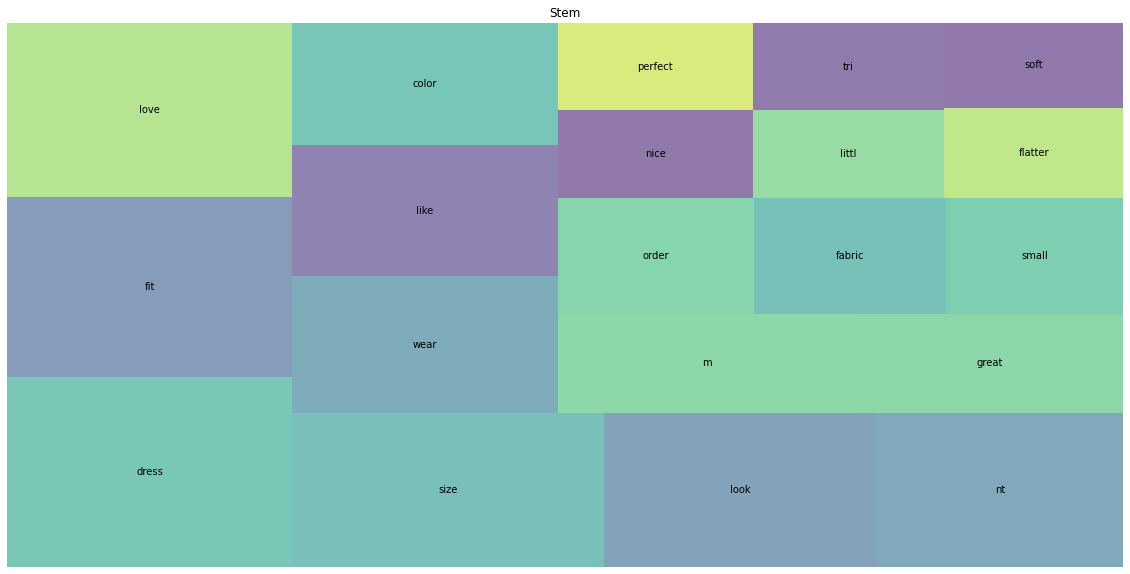

In [76]:
plt.figure(figsize=(20,10))
plt.title('Stem')
squarify.plot(sizes=wc_stem20['percent'][:20], label=wc_stem20['word'][:20], alpha=0.6)
plt.axis('off')
plt.show()

In [74]:
df['lemmas'] = df['Review Text'].apply(token_preprocessing)
tokens = []
for doc in df['lemmas']:
  doc = nlp(doc)
  lemmas = []
  for token in doc:
    if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
      lemmas.append(token.lemma_)
  tokens.append(lemmas)

df['lemmas'] = tokens

In [75]:
wc_lemmas = word_count(df['lemmas'])
wc_lemmas20 = wc_lemmas[wc_lemmas['rank'] <= 20]
wc_lemmas20[:10]

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
0,dress,5896,10586,1.0,0.019921,0.019921,0.299868
36,fit,7807,9753,2.0,0.018353,0.038274,0.397060
20,size,6432,9053,3.0,0.017036,0.055310,0.327128
37,wear,7000,8965,4.0,0.016870,0.072180,0.356017
38,love,7330,8874,5.0,0.016699,0.088879,0.372800
107,look,6278,8194,6.0,0.015419,0.104299,0.319296
126,nt,5796,7478,7.0,0.014072,0.118371,0.294782
90,like,5469,6786,8.0,0.012770,0.131141,0.278151
6,,3729,6762,9.0,0.012725,0.143865,0.189655
58,color,5279,6170,10.0,0.011611,0.155476,0.268487


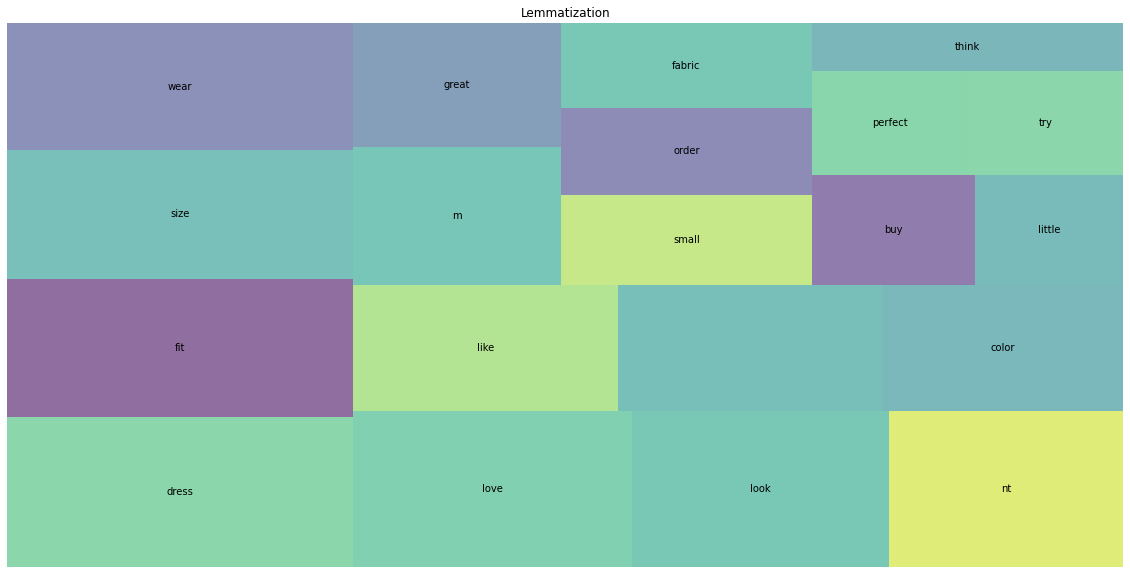

In [77]:
plt.figure(figsize=(20,10))
plt.title('Lemmatization')
squarify.plot(sizes=wc_lemmas20['percent'][:20], label=wc_lemmas20['word'][:20], alpha=0.6)
plt.axis('off')
plt.show()

### 도전과제🔥 
- Spacy 기능을 추가적으로 한 가지 사용해 봅니다.
- 다른 자연어 데이터셋을 이용해서 지금까지 배운 내용을 복습해 봅시다.

In [49]:
### 이곳에서 과제를 진행해 주세요 ### 